In [1]:
# create dummy 1000 circles from scikit

from sklearn.datasets import make_circles

# make 1000 circles
n_samples = 1000

# create circles - make a larger circle containing a smaller one in 2D
X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42 # for reproducibility
)

In [2]:
# the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

`visualize the data`

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
# get the first axis for X1 and the second axis for X2
circles.head(5)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


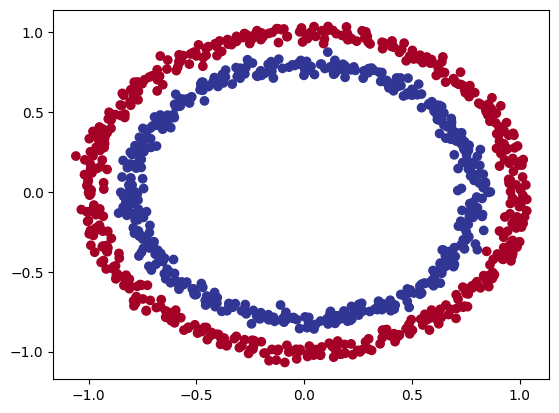

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

`check the shapes of our features and labels`

In [6]:
X.shape, y.shape # y are scalers

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
# what is our first example like
X[5], y[5]
# given the two inputs, can we get the output - classify as a zero or a one

(array([-0.47964637,  0.67643477]), 1)

`Build a Neural Net to Classify either into blue or red circle`

In [9]:
import tensorflow as tf 
import numpy as np

2023-01-11 22:36:13.227678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# convert our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

2023-01-11 22:36:16.873602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# X,y # they are now tensors
X.dtype, y.dtype

(tf.float64, tf.int64)

`create our datasets by indexing`

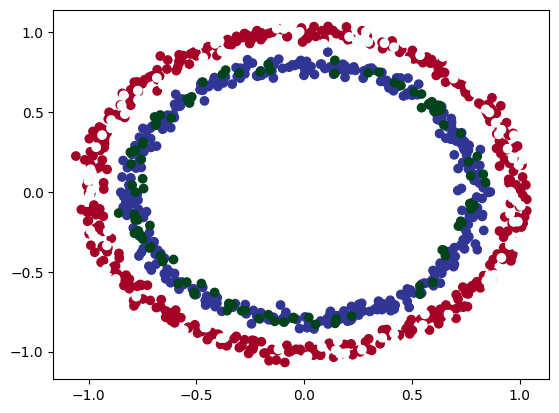

In [12]:
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test,cmap=plt.cm.BuGn)

In [13]:
# # using sckit to split our data - pops dtype error
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
# 1. set random seed
tf.random.set_seed(42)

# 2. create a model using the Sequential API
model = tf.keras.Sequential(
    [
        # tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Dense(100, activation='relu'), # rectifier linear unit
        tf.keras.layers.Dense(1, activation='sigmoid') # output layer
    ]
) 

# 3. Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.035), 
    metrics = 'accuracy' # accuracy - out of 100 examples, how many did our model get right?
)

# 3b Instantiate an EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

# 4. fit the model
model_def = model.fit(X_train, y_train, epochs=150, verbose=0, callbacks=[callback])

In [15]:
# see for how long the thing ran before being callback was initiated
len(model_def.history['accuracy'])

14

Text(0, 0.5, 'param to monitor')

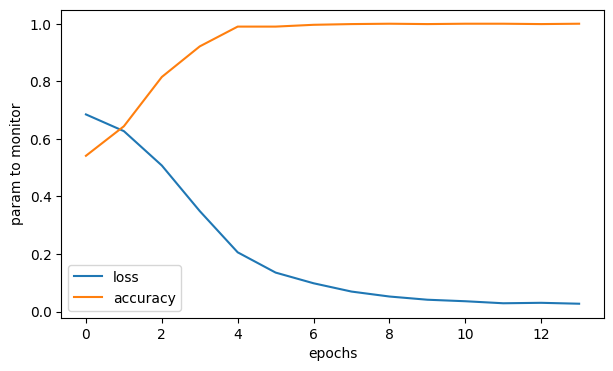

In [16]:
# plot the training before stopping occured
pd.DataFrame(model_def.history).plot(figsize=(7,4))
plt.xlabel('epochs')
plt.ylabel('param to monitor')

In [17]:
model.summary()
model.evaluate(X_test, y_test) # do not evaluate on the model that you have trained on

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 100)                 300       
                                                                 
 dense_1 (Dense)             (32, 1)                   101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
7/7 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9850


[0.05269966274499893, 0.9850000143051147]

In [18]:
y_pred = model.predict(X_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[9.93179023e-01],
       [9.99828577e-01],
       [9.97345150e-01],
       [9.99390364e-01],
       [2.71477431e-01],
       [5.04316948e-02],
       [9.97773170e-01],
       [6.31627953e-03],
       [9.98096943e-01],
       [2.77841967e-02],
       [9.90801215e-01],
       [5.75991809e-01],
       [9.98620212e-01],
       [9.94239032e-01],
       [9.99295771e-01],
       [9.98703182e-01],
       [9.91798997e-01],
       [9.99400437e-01],
       [1.96345244e-02],
       [9.93888676e-01],
       [3.28962505e-02],
       [9.99756336e-01],
       [9.97227728e-01],
       [9.99236703e-01],
       [4.91493493e-02],
       [9.73260760e-01],
       [9.98377562e-01],
       [3.24203670e-01],
       [1.45615097e-02],
       [9.99690711e-01],
       [1.68437921e-02],
       [9.99594867e-01],
       [9.97943699e-01],
       [6.70237541e-02],
       [2.02114254e-01],
       [9.99788523e-01],
       [9.98196483e-01],
       [9.86222208e-01],
       [9.99793291e-01],
       [9.99984562e-01],


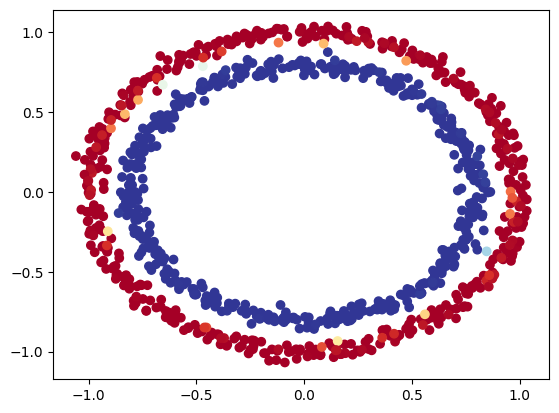

In [19]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred,cmap=plt.cm.RdYlBu)

In [20]:
# save this model in a h5 format
model.save('circles.h5')

`to better understand the performance of the model`

In [21]:
def plot_decision_boundary(model, X, y):
    """
    Plot the decision boundaries created by a model predicting on X
    """

    # define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    
    # create X value - this is where we are going to make predictions on
    x_in = np.c_[xx.ravel(), yy.ravel()] #np.c_ - stacks 2D arrays together

    # make predictions
    y_pred_m = model.predict(x_in)

    # check for multiclass
    if len(y_pred_m[0]) > 1:
        print("performing multiclass classification")
        # therefore, we reshape our predictions and ready them for plotting
        y_pred_m = np.argmax(y_pred_m, axis=1).reshape(xx.shape)
    else:
        print("perfoming binary classification")
        y_pred_m = np.round(y_pred_m).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred_m, cmap=plt.cm.RdYlBu, alpha=1)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [22]:
# # check the prediction our model is making
# plot_decision_boundary(
#     model=model,
#     X=X_test,
#     y=y_test
# )

`create a learning rate callback`

In [32]:
# set random seed
tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(7, activation='relu'),
        tf.keras.layers.Dense(9, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# Compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(), # we are going to set up a lr callback
    metrics = 'accuracy'
)

# Create a LR callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(f)
# Create an EarlyStopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=5)

# Pass in lr_scheduler into the fit
# Fit the model
model_sc = model.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[lr_scheduler,early_stop])

In [26]:
# trying to understand the functionality of the lambda

def f(epoch):
    return 1e-4 * 10**(epoch/20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(f)

`figured out a difference in performance while using lambda vs using my defined function f .... lambda defined has a better perfomance compared to def (f)`
* 3.5 seconds vs 2.4 seconds (these figures have been run on repeat)

In [24]:
# check for how many times it ran
len(model_sc.history['accuracy'])

6

<AxesSubplot: xlabel='epochs'>

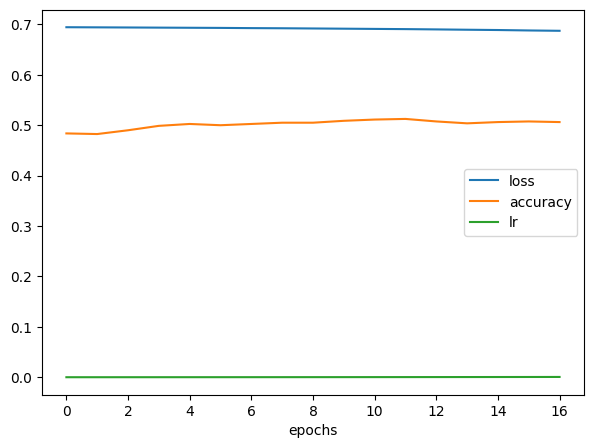

In [28]:
# check out the entire history
pd.DataFrame(model_sc.history).plot(figsize=(7,5), xlabel='epochs')